In [1]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import pdb
import time
import calendar
import pyfftw
from comb_utils import *
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('coupling_q_1.csv')

In [12]:
df[['lambda','Qc']].head()

,lambda,Qc
0,1.000000,1.921538e+08
1,1.071429,1.051074e+08
2,1.142857,6.118730e+07
3,1.214286,3.746499e+07
4,1.285714,2.391156e+07


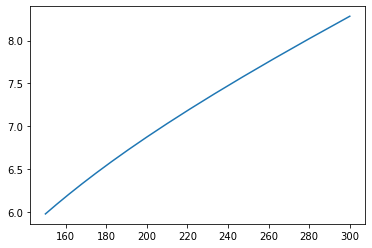

In [14]:
plt.plot(3e2/df['lambda'],np.log10(df['Qc']))

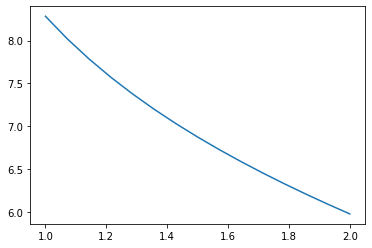

In [16]:
plt.plot(df['lambda'],np.log10(df['Qc']))

In [23]:
def PolyCoefficients(x, coeffs):
        """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

        The coefficients must be in ascending order (``x**0`` to ``x**o``).
        """
        o = len(coeffs)
        print(f'Dint is a polynomial of order {o-1}.')
        y = 0
        coeffs = coeffs[::-1]
        for i in range(o):
            y += coeffs[i]*x**i
        return y

In [21]:
coeffs = np.polyfit(3e2/df['lambda'],df['Qc'],deg=9)

In [24]:
fittedy = PolyCoefficients(3e2/df['lambda'], np.polyfit(3e2/df['lambda'],df['Qc'],deg=9))

Dint is a polynomial of order 9.


In [26]:
fittedy - df['Qc']

0     -0.120957
1      1.835016
2    -11.298222
3     35.675048
4    -57.588397
5     30.614194
6     35.219137
7    -37.272772
8    -39.435832
9     54.618734
10    20.766258
11   -50.679936
12    10.156196
13    12.685217
14    -5.173817
dtype: float64

ω_start = 150.0012 THz, ω_end = 149.997 THz
λ_start = 1998.600397863484 nm, λ_end = 1998.6563597938623 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 4200000.0 GHz/s 
sweep speed (λ space) = 55961.93037847607 nm/s
real time = 1e-06, normalized time = 150.0 (relevant parameters: total_time), dt = 0.001
Simulation points = 10000000.0 (relevant parameters: dt)
detuning at start = -1.2 GHz, detuning at end = 3.0 GHz (relevant parametes: ω_range, λ_range)
Dint is a polynomial of order 9.
g0 = 0.3149395767577133, Veff = 7.037167544041137e-16, F^2 = 28.166146158423505


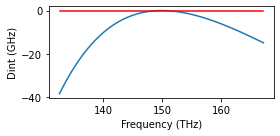

In [4]:
B = microring(R=80e-6,height=1e-6,width=1.4e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=3e8/2e-6,λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Dint_file='new_shg_100R_1umto2um.csv',dt=1e-3,
                Nmodes=2**7,pump=200e-3,snapshots=2000,mode_offset=0,Dint_degrees=9)

In [3]:
B.Δωext

array([1.24433320e+07, 1.27280562e+07, 1.30228185e+07, 1.33281222e+07,
       1.36445042e+07, 1.39725374e+07, 1.43128344e+07, 1.46660504e+07,
       1.50328873e+07, 1.54140977e+07, 1.58104898e+07, 1.62229321e+07,
       1.66523597e+07, 1.70997804e+07, 1.75662821e+07, 1.80530404e+07,
       1.85613282e+07, 1.90925257e+07, 1.96481316e+07, 2.02297766e+07,
       2.08392376e+07, 2.14784548e+07, 2.21495508e+07, 2.28548524e+07,
       2.35969156e+07, 2.43785547e+07, 2.52028751e+07, 2.60733127e+07,
       2.69936784e+07, 2.79682104e+07, 2.90016362e+07, 3.00992449e+07,
       3.12669728e+07, 3.25115058e+07, 3.38404009e+07, 3.52622328e+07,
       3.67867711e+07, 3.84251952e+07, 4.01903586e+07, 4.20971134e+07,
       4.41627141e+07, 4.64073239e+07, 4.88546537e+07, 5.15327776e+07,
       5.44751847e+07, 5.77221496e+07, 6.13225419e+07, 6.53362478e+07,
       6.98374576e+07, 7.49192072e+07, 8.06997659e+07, 8.73318108e+07,
       9.50159195e+07, 1.04020951e+08, 1.14715799e+08, 1.27620686e+08,
      

ω_start = 193.41602939368178 THz, ω_end = 193.41063812869876 THz
λ_start = 1549.987655830728 nm, λ_end = 1550.0308612834056 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 5391264.98303125 GHz/s 
sweep speed (λ space) = 43205.45267761931 nm/s
real time = 1e-06, normalized time = 192.54517796539992 (relevant parameters: total_time), dt = 0.001
Simulation points = 3209086.0 (relevant parameters: dt)
detuning at start = -1.54036142371875 GHz, detuning at end = 3.8509035593125 GHz (relevant parametes: ω_range, λ_range)
Dint is a polynomial of order 9.
g0 = 1.0199359714377958, Veff = 3.6128315516282617e-16, F^2 = 10.684824048461044


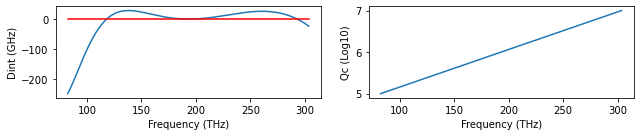

In [3]:
A = microring(R=25e-6,height=1e-6,width=2.3e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=299792458/1.550e-6,λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Qc_import=10**np.linspace(5,7,2**8),
                Dint_file='2.300w_58.5r_0.960h.csv',dt=1e-3,
                Nmodes=2**8,pump=50e-3,snapshots=2000,mode_offset=0,Dint_degrees=9)

In [5]:
A.Δωext

array([1.91674712e+08, 1.88244213e+08, 1.84875111e+08, 1.81566309e+08,
       1.78316725e+08, 1.75125301e+08, 1.71990995e+08, 1.68912786e+08,
       1.65889669e+08, 1.62920658e+08, 1.60004785e+08, 1.57141099e+08,
       1.54328666e+08, 1.51566568e+08, 1.48853905e+08, 1.46189792e+08,
       1.43573360e+08, 1.41003755e+08, 1.38480140e+08, 1.36001691e+08,
       1.33567600e+08, 1.31177074e+08, 1.28829332e+08, 1.26523608e+08,
       1.24259152e+08, 1.22035223e+08, 1.19851098e+08, 1.17706062e+08,
       1.15599418e+08, 1.13530477e+08, 1.11498565e+08, 1.09503019e+08,
       1.07543188e+08, 1.05618434e+08, 1.03728127e+08, 1.01871653e+08,
       1.00048405e+08, 9.82577881e+07, 9.64992190e+07, 9.47721240e+07,
       9.30759396e+07, 9.14101127e+07, 8.97741000e+07, 8.81673677e+07,
       8.65893920e+07, 8.50396581e+07, 8.35176606e+07, 8.20229030e+07,
       8.05548979e+07, 7.91131663e+07, 7.76972382e+07, 7.63066517e+07,
       7.49409532e+07, 7.35996972e+07, 7.22824464e+07, 7.09887711e+07,
      